# Zoom slice plot
This notebook plots out a 2D figure that slices through a third dimension, with the remaining three dimensions averaged. 

## Imports, colour maps, fonts

In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from matplotlib import colors

In [2]:
cm_data =np.loadtxt("/home/users/eers/colour_maps/ScientificColourMaps6/imola/imola.txt")
cmap = colors.LinearSegmentedColormap.from_list('imola', cm_data)

In [3]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Load files

In [6]:
slices = []
for i in range(10):
    slices.append(np.loadtxt(f"predictions/mean_slices/mean_slice_transition_time_254_slice{i}_nv.csv", delimiter=','))

mean24 = np.loadtxt("predictions/mean_pairs/mean_pair_transition_time_24_nv.csv", delimiter=',')
mean25 = np.loadtxt("predictions/mean_pairs/mean_pair_transition_time_25_nv.csv", delimiter=',')
mean45 = np.loadtxt("predictions/mean_pairs/mean_pair_transition_time_45_nv.csv", delimiter=',')

## Make plot

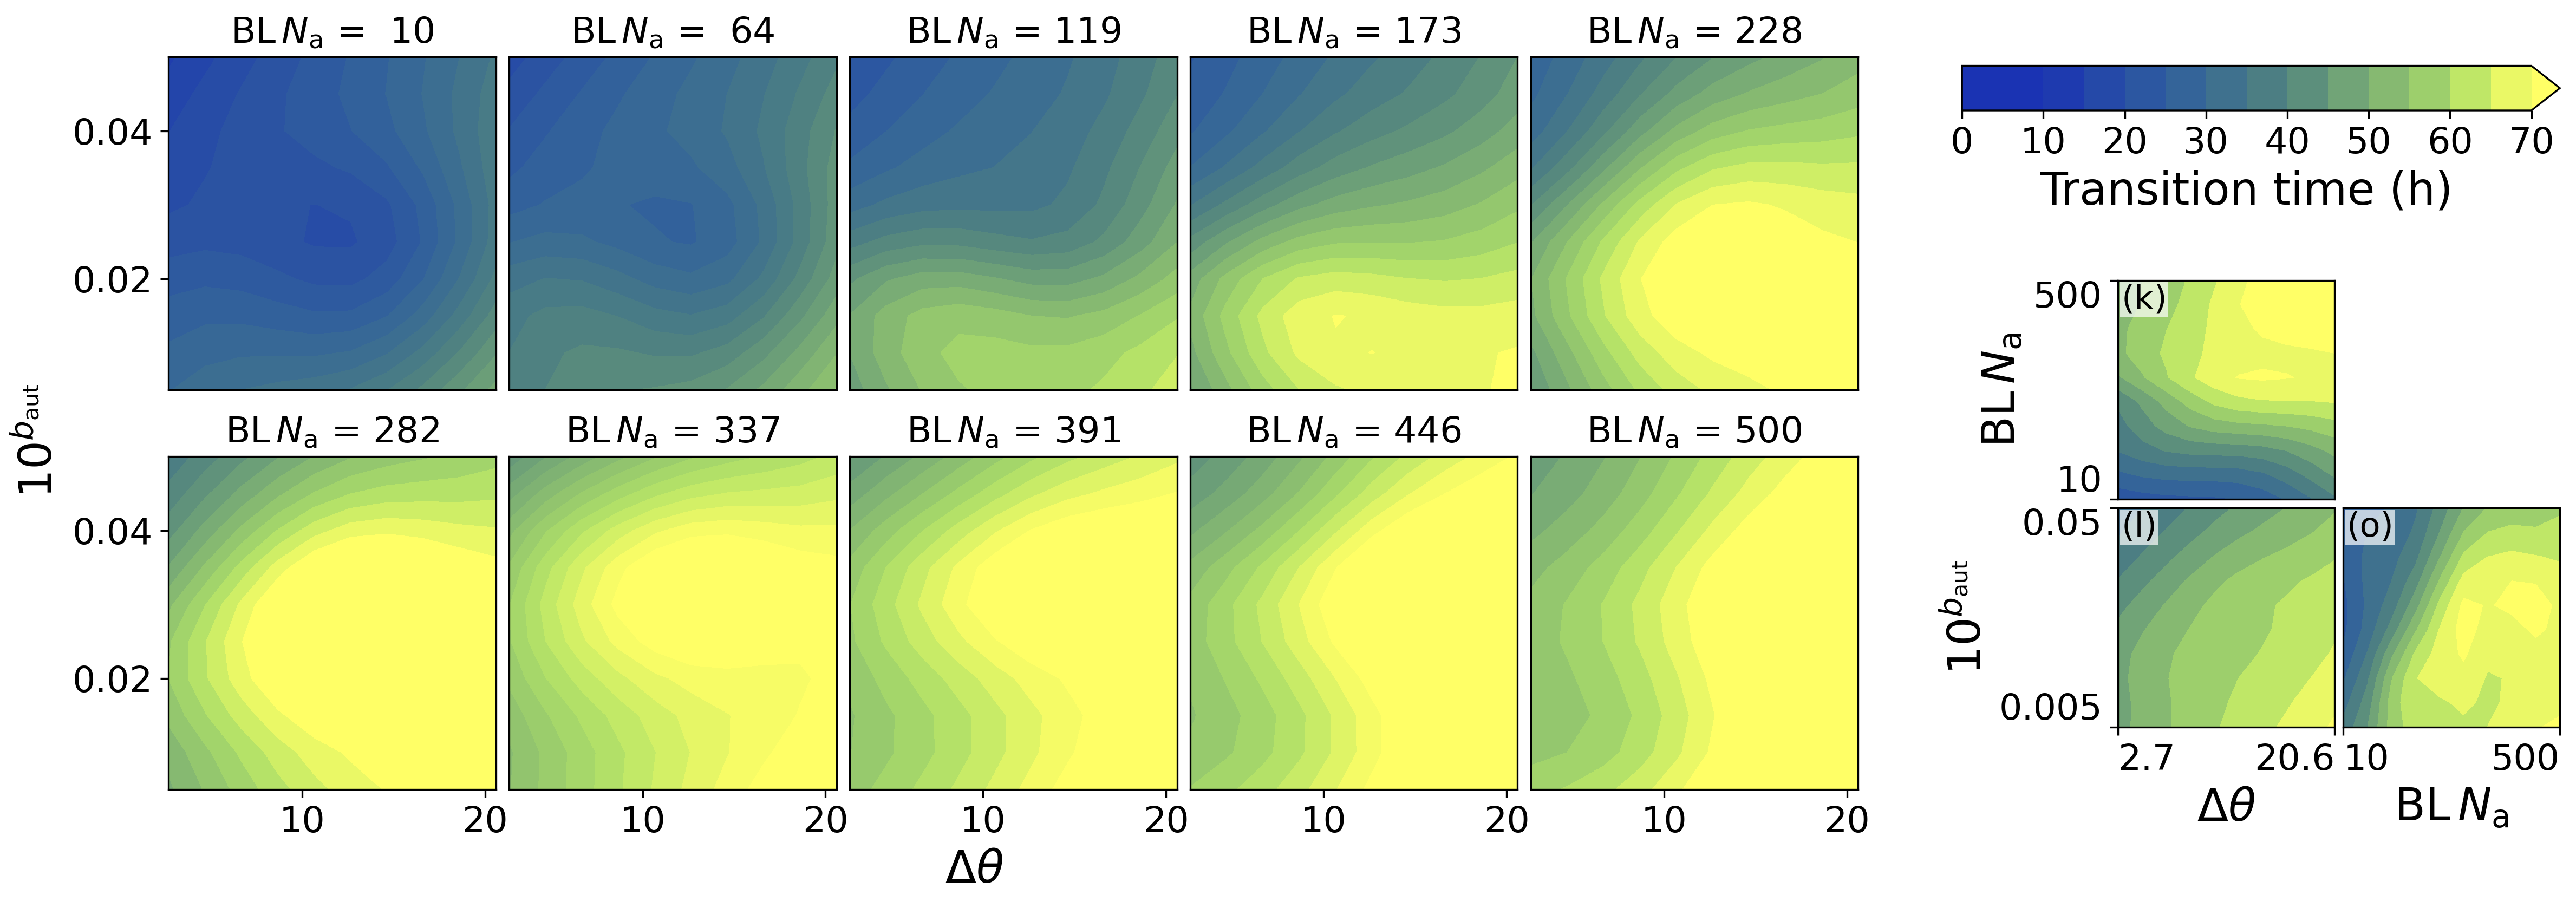

In [7]:
ax_names=[(7, 11.5),(485,1280),(2.7,20.6),(-7.6,-1.4),(10,500),(0.005,0.05)]
p_labels = ['$\mathrm{BL}\,\mathit{q}_{\mathrm{v}}$', '$\mathrm{BL}\,\mathit{z}$', r'$\Delta\theta$', 
            '$\Delta\mathit{q}_{\mathrm{v}}$', '$\mathrm{BL}\,\mathit{N}_{\mathrm{a}}$', '10$^{b_{\mathrm{aut}}}$']
x_positions=[[7, 11.5],[485,1280],[2.7,20.6],[-7.6,-1.4],[10,500],[0.005,0.05]]
y_positions=[[11.5],[1280],[20.6],[-1.4],[10,500],[0.005,0.05]]

fig = plt.figure(figsize=(16,5.5),dpi=300)
gs1 = GridSpec(2,5,left=0.07,bottom=0.11,top=0.93,right=0.72,hspace=0.2,wspace=0.04)
ax_baut = []
for i in range(10):
    ax_baut.append(fig.add_subplot(gs1[i]))
    
gs2 = GridSpec(2,2,left=0.82,bottom=0.18,top=0.68,right=0.99,hspace=0.04,wspace=0.04)
ax_m = []
for j in [0,2,3]:
    ax_m.append(fig.add_subplot(gs2[j]))

for ind1, ind2, ax, mean, letter in zip([2,2,4],[4,5,5], ax_m, [mean24,mean25,mean45], ["k","l","o"]): 
    #ax.set_title(p_labels[ind1], pad=-100, fontsize=MEDIUM_SIZE)
    x = np.linspace(ax_names[ind1][0], ax_names[ind1][1], 10)
    y = np.linspace(ax_names[ind2][0], ax_names[ind2][1], 10)
    x_, y_ = np.meshgrid(x, y)
    c_obj = ax.contourf(x_, y_, mean, cmap=cmap, norm=plt.Normalize(10, 70), levels=np.linspace(0,70,15), extend="max")
    c_obj = ax.contourf(x_, y_, mean, cmap=cmap, norm=plt.Normalize(10, 70), levels=np.linspace(0,70,15), extend="max")

    ax.set_xticks(x_positions[ind1])
    ax.set_yticks(y_positions[ind2])
    ax.set_yticklabels(y_positions[ind2])
    ax.set_xlabel(p_labels[ind1],fontsize=MEDIUM_SIZE)
    ax.set_ylabel(p_labels[ind2],fontsize=MEDIUM_SIZE)
    ax.text(0.015, 0.87, f"({letter})", color='black', transform=ax.transAxes,fontsize=BIGGER_SIZE, 
                    bbox=dict(facecolor='white', edgecolor='none', pad=0.4, alpha=0.7))
    xlabels = ax.get_xticklabels()
    xlabels[0].set_horizontalalignment('left')
    xlabels[-1].set_horizontalalignment('right')
        
    ylabels = ax.get_yticklabels()
    ylabels[0].set_verticalalignment('bottom')
    ylabels[-1].set_verticalalignment('top')

ax_m[0].xaxis.set_visible(False)
ax_m[2].yaxis.set_visible(False)
ax_m[1].set_yticklabels(y_positions[5])

ind1=2
ind2=5
other_index=4
z = np.linspace(ax_names[other_index][0], ax_names[other_index][1], 10)
for i in range(10):
    x = np.linspace(ax_names[ind1][0], ax_names[ind1][1], 10)
    y = np.linspace(ax_names[ind2][0], ax_names[ind2][1], 10)
    x_, y_ = np.meshgrid(x, y)
    c_obj2 = ax_baut[i].contourf(x_, y_, slices[i], norm=plt.Normalize(10, 70), cmap=cmap, levels=15)  ## only works because we are looking at autoconversion at the end
    c_obj2 = ax_baut[i].contourf(x_, y_, slices[i], norm=plt.Normalize(10, 70), cmap=cmap, levels=15)
    #ax_baut[i].set_title("10$^{b_{aut}}$"+" = {:0.3f}".format(z[i]))
    ax_baut[i].set_title("$\mathrm{BL}\,\mathit{N}_{\mathrm{a}}$"+" = {:3.0f}".format(z[i]))

    if i in [0,1,2,3,4]:
        ax_baut[i].xaxis.set_visible(False)
    if i in [1,2,3,4,6,7,8,9]:
        ax_baut[i].yaxis.set_visible(False)

fig.text(0.02,0.5,p_labels[ind2],fontsize=MEDIUM_SIZE,ha='center', va='center',rotation=90)
fig.text(0.38,0.02,p_labels[ind1],fontsize=MEDIUM_SIZE,ha='center', va='center',rotation=0)

c_obj.set_clim(10,70)
cax = plt.axes([0.76, 0.87, 0.23, 0.05])
fig.colorbar(c_obj, label="Transition time (h)", cmap=cmap,cax=cax, norm=plt.Normalize(10, 70), orientation="horizontal",extend='max')

fig.savefig("figures/zoom_2d_grid10_meanslice_transition_time.png",facecolor='white',dpi=300)
fig.savefig("figures/zoom_2d_grid10_meanslice_transition_time.pdf",facecolor='white',dpi=300)